# Classification

## Problem Statement

In classification algorithms the model is designed to predict the output class/category from some possible categories by providing some input features. Below are some of the examples:

|Question                               |Answers       |
|:--------------------------------------|:-------------|
|Is the email spam?                     |no/yes        |
|Is the transaction fraudulent?         |no/yes        |
|Is the tumor mallignant?               |no/yes        |


In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp_X1 = np.array([0, 1, 2, 3, 4, 5])
temp_y1 = np.array([0, 0, 0, 1, 1, 1])
temp_X2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
temp_y2 = np.array([0, 0, 0, 1, 1, 1])


pos1 = temp_y1 == 1
neg1 = temp_y1 == 0

pos2 = temp_y2 == 1
neg2 = temp_y2 == 0
pos2 = pos2.reshape(-1,)  #work with 1D or 1D y vectors
neg2 = neg2.reshape(-1,)

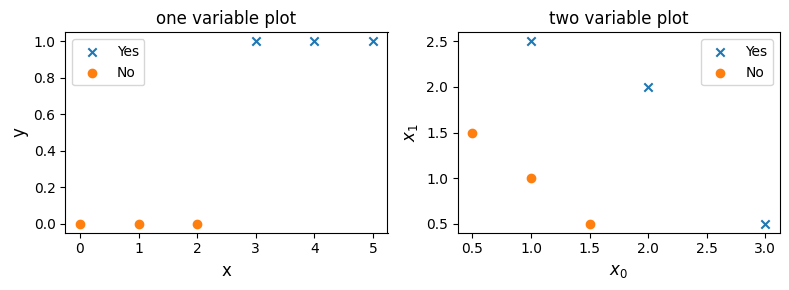

In [3]:
fig,ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].scatter(temp_X1[pos1], temp_y1[pos1], marker='x', label="Yes")
ax[0].scatter(temp_X1[neg1], temp_y1[neg1], marker='o', label="No")

ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()


ax[1].scatter(temp_X2[pos2, 0], temp_X2[pos2, 1], marker='x', label="Yes")
ax[1].scatter(temp_X2[neg2, 0], temp_X2[neg2, 1], marker='o', label="No")
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout(rect=[0,0,1,1])

### Trying linear regression approach

$$f_{w,b}{(X^{i})} = w^{(i)}.X^{(i)} + b$$

In [4]:
from utils.linear_regression import run_gradient_descent, model_function, compute_cost

temp_w1, temp_b1 = run_gradient_descent(temp_X1.reshape(-1,1), temp_y1, np.zeros(1), 0, alpha=0.001, num_iters=100000)
print(f"(w, b) = {(temp_w1, temp_b1)}")

(w, b) = (array([0.25714286]), -0.14285714285707546)


In [5]:
temp_w2, temp_b2 = run_gradient_descent(temp_X2, temp_y2, np.zeros(2), 0, alpha=0.001, num_iters=100000)
print(f"(w, b) = {(temp_w2, temp_b2)}")

(w, b) = (array([0.58601998, 0.56341814]), -1.1301579350535618)


In [6]:
temp_y1_predictions = model_function(temp_X1.reshape(-1,1), temp_w1, temp_b1)
temp_y2_predictions = model_function(temp_X2, temp_w2, temp_b2)

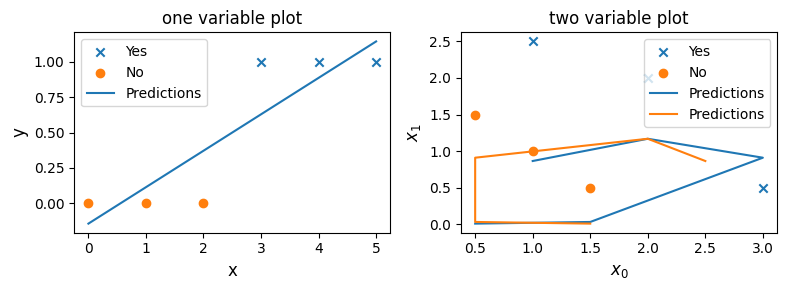

In [7]:
fig,ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].scatter(temp_X1[pos1], temp_y1[pos1], marker='x', label="Yes")
ax[0].scatter(temp_X1[neg1], temp_y1[neg1], marker='o', label="No")
ax[0].plot(temp_X1, temp_y1_predictions, label="Predictions")

ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()


ax[1].scatter(temp_X2[pos2, 0], temp_X2[pos2, 1], marker='x', label="Yes")
ax[1].scatter(temp_X2[neg2, 0], temp_X2[neg2, 1], marker='o', label="No")
ax[1].plot(temp_X2, temp_y2_predictions, label="Predictions")
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout(rect=[0,0,1,1])

We can keep the threshold for X and predict 0 if output is less than threshold else 1. But this will not solve the problem as after we add any new points then the slope may change and hence model predictions will become worse. 

Hence, we can conclude that the linear regression model cannot be used to solve the classification problem. 

### Sigmoid Function

In order to solve the problem, we use the sigmoid function

$$g(z) = \frac{1}{1 + e^{-z}} \tag{1}$$

and,

$$0 <= g(z) <= 1 \tag{1}$$

In [8]:
def sigmoid(z):
    """
    Returns the sigmoid of input

    Args:
        z (vector) : Input
    Output:
        sig (vector): Sigmoid of z
    """

    # np.exp(x) can be used to calculated e^x
    sig = 1 / (1 + np.exp(-z))
    return sig

In [9]:
temp_z = np.linspace(-10,10,1000)
temp_sig_z = sigmoid(temp_z)

Text(0, 0.5, 'Sigmoid of z')

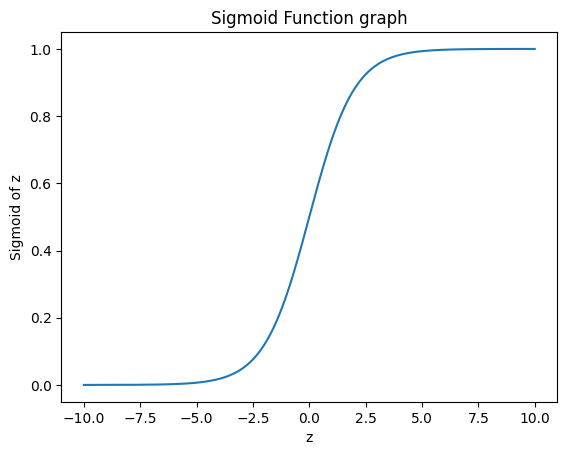

In [10]:
plt.plot(temp_z, temp_sig_z)
# plt.grid(True)
plt.title("Sigmoid Function graph")
plt.xlabel("z")
plt.ylabel("Sigmoid of z")

### Using the sigmoid function to solve the classification problem (Logistic Regression)

Let us store the output of linear regression function in z

$$z = w.x + b \tag{1}$$

Sigmoid function

$$g(z) = \frac{1}{1 + e^{-z}} \tag{2}$$

Putting equation 1 and 2 we get our logistic regression function

$$f_{w,b}(X) = g(z) \tag{3}$$

$$f_{w,b}(X) = \frac{1}{1 + e^{-(w.x + b)}} \tag{1}$$

In [11]:
def classification_model(X, w, b):
    """
    Return output of logistic regression function

    Args:
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    # Use the model function to calculate "w.x + b"
    z = model_function(X, w, b)

    # Applying the logistic regression function
    p = sigmoid(z)
    return p

In [12]:
X = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0, 0, 1, 1, 1])

In [13]:
y_prediction = classification_model(X.reshape(-1, 1), np.array([5]), -12)
y_prediction

array([6.14417460e-06, 9.11051194e-04, 1.19202922e-01, 9.52574127e-01,
       9.99664650e-01, 9.99997740e-01])

The output of the model can be treated as the probablity of that class. If the output is 0.76 then there is 76% change for class 1 that is Yes.

$$f_{(w,b)}(X) = P(y = 1|X;w,b)$$

i.e. probability of y = 1, given input X with model parameters w and b

### Decision boundry

A decision boundary is a line which seperates the output classes, In case of 2 features decision boundry will be that line where all (or most) samples of one class are on one side of that line, and all samples of the other class are on the opposite side of the line.

Let us derive the decision boundry for the above example

f(x) >= threshold
=> g(z) >= threshold
=> z >= 0
=> wx + b >= 0

For our example, w = 5 and b = 12, substituting the values in our equation
=> 5x + 12 >= 0
=> x >= -12/5
=> x >= 2.4

Hence for the above example our decision boundry line is X = 2.4 i.e. if $X^{(i)}$ >= 2.4 then predict 1 else 0

By using higher order polynomial terms (eg: $f(x) = g( x_0^2 + x_1 -1)$, we can come up with more complex non-linear boundaries.

### Plotting Decision boundry

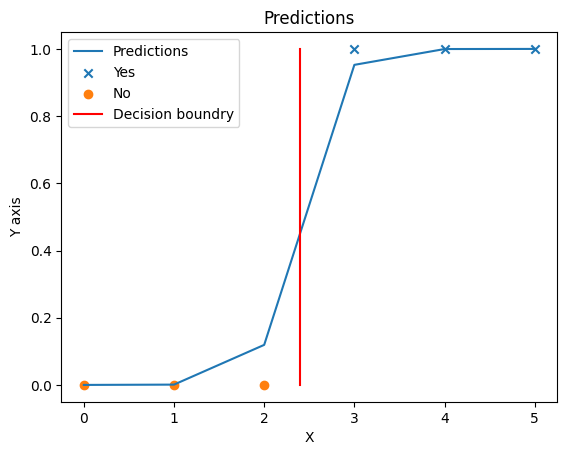

In [14]:

plt.plot(X, y_prediction, label="Predictions")
plt.scatter(X[y == 1], y[y == 1], marker="x", label="Yes")
plt.scatter(X[y == 0], y[y == 0], marker="o", label="No")

# Plotting decision boundry line X = 2.4
plt.plot(np.array([2.4] * 10), np.linspace(0,1,10), label="Decision boundry", color="red")

plt.xlabel("X")
plt.ylabel("Y axis")
plt.title("Predictions")
plt.legend()

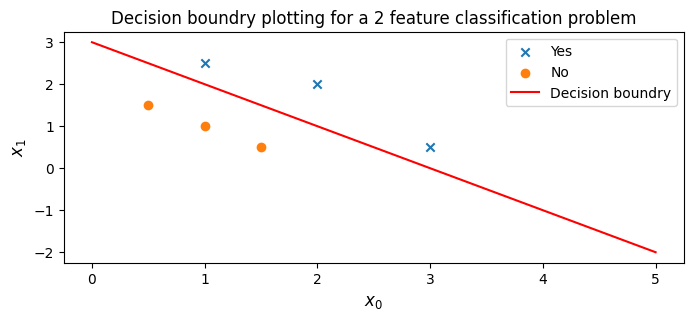

In [15]:
X2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y2 = np.array([0, 0, 0, 1, 1, 1])

fig, ax = plt.subplots(1, 1, figsize=(8,3))

x0 = np.arange(0,6)
x1 = 3 - x0

ax.scatter(X2[y == 1, 0], X2[y == 1, 1], marker='x', label="Yes")
ax.scatter(X2[y == 0, 0], X2[y == 0, 1], marker='o', label="No")

# Decision boundry: x1 + x2 = 3
ax.plot(x0, x1, label="Decision boundry", color='red')

ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.set_title('Decision boundry plotting for a 2 feature classification problem')
ax.legend()

### Cost function

<img align="left" src="./images/classification/01_classification_squared_error_cost_function.jpg" style=" width: 60%; padding-right: 20px; ">

In case of linear regression, the Cost function was convex and therefore gradient descent would work for it. But it case of logistic regression the Cost function is non convex and will contain a lot of local minimum. Hence the gradient descent would not work as it may get stuck in any of local minimum which might not be the global minimum.

**Squared error cost**:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$ 
 
where 
  $$f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$$


In [16]:
def compute_squared_error_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): squared error cost
    """

    cost = 0
    m = X.shape[0]
    y_predictions = classification_model(X, w, b)

    for i in range(m):
        diff = y_predictions[i] - y[i]
        cost = cost + diff ** 2
    cost = cost / (2 * m)
    
    return cost

In [17]:
X = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0, 0, 1, 1, 1])
temp_ws = np.linspace(0, 20, num=10000)
temp_b = -12

temp_costs = np.zeros(temp_ws.shape[0])

for i, each_w in enumerate(temp_ws):
    temp_costs[i] = compute_squared_error_cost(X.reshape(-1, 1), y, np.array([each_w]), temp_b)

Text(0.5, 1.0, 'Squared error cost graph for logistic regression')

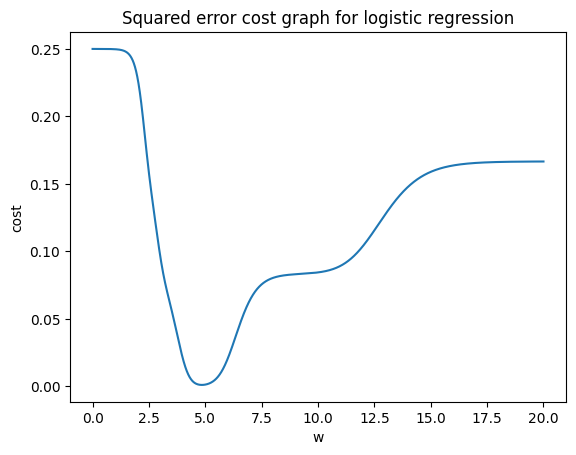

In [18]:
plt.plot(temp_ws, temp_costs)
plt.xlabel("w")
plt.ylabel("cost")
plt.title("Squared error cost graph for logistic regression")

In order to solve the non-convex cost function, we use the **Loss function** in Logistic regression to determine the cost. 

Loss Function is defined as: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target.


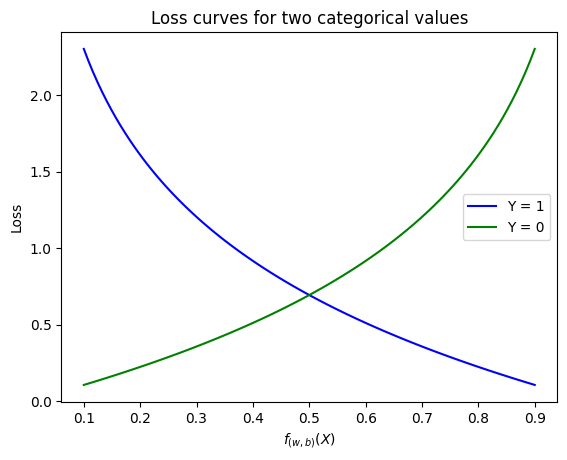

In [19]:
"""
Printing log graphs for y = 0 and y = 1
"""
x0 = np.linspace(0.1,0.9, num=100)
-1 * np.log(1 - x0)
plt.plot(x0, -1 * np.log(x0), label="Y = 1", color="blue")
plt.plot(x0, -1 * np.log(1 - x0), label="Y = 0", color="green")
plt.xlabel("$f_{(w,b)}(X)$")
plt.ylabel("Loss")
plt.title("Loss curves for two categorical values")
plt.legend()

The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
  
This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$

We can use this loss function to create our cost function for logistic regression

**Cost Function**

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} [- y^{(i)}log(f_{(w,b)}(x^{(i)})) - (1 - y^{(i)})log(1 - f_{(w,b)}(x^{(i)}))] \tag{1}$$

In [20]:
def compute_cost_logistic_regression(X, y, w, b):
    """
    Computes cost for logistic regression

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    y_predictions = classification_model(X, w, b)
    cost = 0.0
    for i in range(m):
        if (1 - y_predictions[i]) > 0 and y_predictions[i] > 0:
            cost +=  -y[i] * np.log(y_predictions[i]) - (1 - y[i]) * np.log(1 - y_predictions[i])
             
    cost = cost / m
    return cost

In [21]:
X = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0, 0, 1, 1, 1])
temp_ws = np.linspace(0, 20, num=1000)
temp_b = -12

temp_costs = np.zeros(temp_ws.shape[0])

for i, each_w in enumerate(temp_ws):
    temp_costs[i] = compute_cost_logistic_regression(X.reshape(-1, 1), y, np.array([each_w]), temp_b)

Text(0.5, 1.0, 'Cost function graph for logistic regression using Loss')

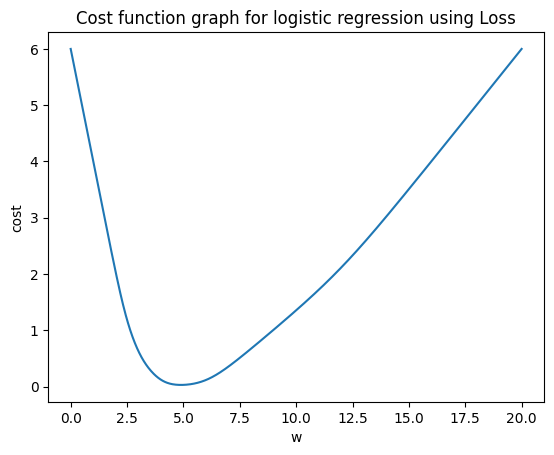

In [22]:
plt.plot(temp_ws, temp_costs)
plt.xlabel("w")
plt.ylabel("cost")
plt.title("Cost function graph for logistic regression using Loss")

Now that we have created the cost function for Logistic regression we can implement the gradient descent algorithm to minimize the cost and identify w and b

### Gradient Descent algorithm

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

### Implementation

In [23]:
def compute_gradient_logistic_regression(X, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0

    y_predictions = classification_model(X, w, b)
    for i in range(m):
        for j in range(n):
            dj_dw[j] = dj_dw[j] + ((y_predictions[i] - y[i]) * X[i][j])
        dj_db = dj_db + (y_predictions[i] - y[i])

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [24]:
def run_gradient_descent_logistic_regression(X, y, w_in, b_in, alpha=0.001, num_iters=1000):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
    """

    m, n = X.shape
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_logistic_regression(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w, b

In [25]:
X = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0, 0, 1, 1, 1])
w_tmp  = np.zeros(1)
b_tmp  = 0
alpha = 0.1
num_iters = 10000

w_out, b_out = run_gradient_descent_logistic_regression(X.reshape(-1,1), y, w_tmp, b_tmp, alpha=alpha, num_iters=num_iters) 
print(f"\nUpdated parameters: w:{w_out}, b:{b_out}")


Updated parameters: w:[5.1198735], b:-12.609503113679205


In [26]:
X1 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y1 = np.array([0, 0, 0, 1, 1, 1])
w_tmp  = np.zeros(2)
b_tmp  = 0
alpha = 0.1
num_iters = 10000

w_out, b_out = run_gradient_descent_logistic_regression(X1, y1, w_tmp, b_tmp, alpha=alpha, num_iters=num_iters) 
print(f"\nUpdated parameters: w:{w_out}, b:{b_out}")


Updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019839
